In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
 lm=tf.keras.models.load_model('/content/drive/MyDrive/my_model.keras')

In [4]:
lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 80, 300)           186000    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 80, 300)           0

In [5]:
lmrc=tf.keras.models.load_model('/content/drive/MyDrive/reduced_complexity_model.keras')

In [6]:
lmrc.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirect  (None, 80, 600)           732000    
 ional)                                                          
                                                                 
 bidirectional_37 (Bidirect  (None, 80, 500)           1702000   
 ional)                                                          
                                                                 
 bidirectional_38 (Bidirect  (None, 80, 300)           781200    
 ional)                                                          
                                                                 
 bidirectional_39 (Bidirect  (None, 80, 200)           320800    
 ional)                                                          
                                                                 
 dense_18 (Dense)            (None, 80, 50)           

In [7]:
lmt=tf.keras.models.load_model('/content/drive/MyDrive/model_tanh.keras')

In [8]:
lmt.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 80, 300)           186000    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 80, 300)           541200    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 80, 300)           0

In [9]:
train = pd.read_csv("/content/drive/MyDrive/trainmod.csv")

In [10]:
feature_cols = ["R","C", "u_in", "u_out"]

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
n_steps = 80
n_features = len(feature_cols)
target_column_name = 'pressure'  # Replace with the actual target column name

# Assuming "train" is a DataFrame containing your training data
n_samples_train = len(train) // n_steps  # Calculate the number of breaths
y_train = train[target_column_name].values[:n_samples_train * n_steps].reshape(-1, n_steps)
X_train = train[feature_cols].values[:n_samples_train * n_steps].reshape(-1, n_steps, n_features)

print(X_train.shape, y_train.shape)

(60360, 80, 4) (60360, 80)


# Training Data

1/1 [==============================] - 5s 5s/step
Mean Absolute Error (MAE): 0.20352394496343126


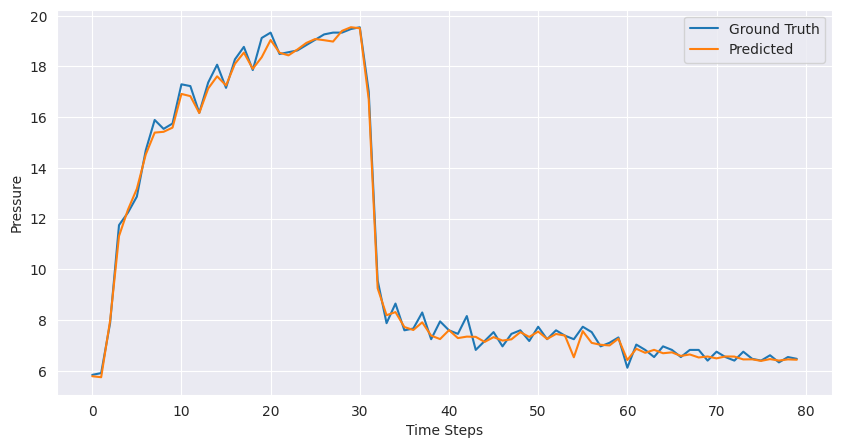

In [13]:
idx = 1
df_plot = train[train['breath_id'] == idx]
p = lm.predict(df_plot[feature_cols].values.reshape(-1, n_steps, n_features))
x = range(len(df_plot))  # Use the length of df_plot for x values
y = df_plot['pressure']
mae = mean_absolute_error(y, p.reshape(-1))
print(f"Mean Absolute Error (MAE): {mae}")
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y, label="Ground Truth")
sns.lineplot(x=x, y=p.reshape(-1), label="Predicted")
plt.legend()
plt.ylabel("Pressure")
plt.xlabel("Time Steps")
plt.show()

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.2505549061818978


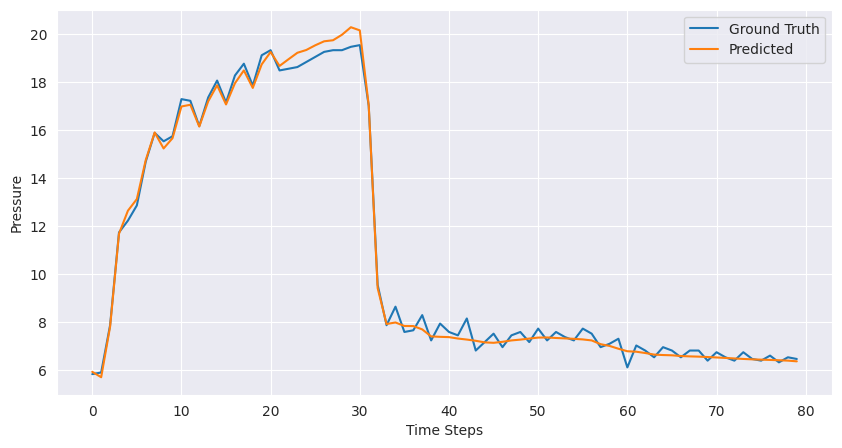

In [14]:
idx = 1
df_plot = train[train['breath_id'] == idx]
p = lmrc.predict(df_plot[feature_cols].values.reshape(-1, n_steps, n_features))
x = range(len(df_plot))  # Use the length of df_plot for x values
y = df_plot['pressure']
mae = mean_absolute_error(y, p.reshape(-1))
print(f"Mean Absolute Error (MAE): {mae}")
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y, label="Ground Truth")
sns.lineplot(x=x, y=p.reshape(-1), label="Predicted")
plt.legend()
plt.ylabel("Pressure")
plt.xlabel("Time Steps")
plt.show()

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.1927886219909601


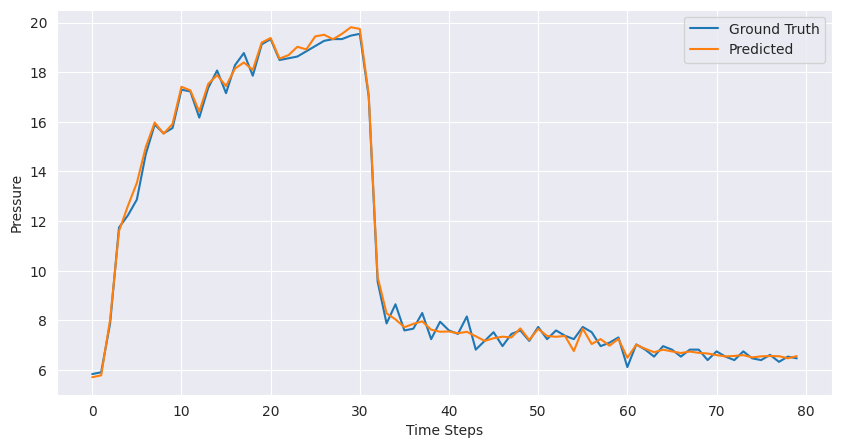

In [15]:
idx = 1
df_plot = train[train['breath_id'] == idx]
p = lmt.predict(df_plot[feature_cols].values.reshape(-1, n_steps, n_features))
x = range(len(df_plot))  # Use the length of df_plot for x values
y = df_plot['pressure']
mae = mean_absolute_error(y, p.reshape(-1))
print(f"Mean Absolute Error (MAE): {mae}")
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y, label="Ground Truth")
sns.lineplot(x=x, y=p.reshape(-1), label="Predicted")
plt.legend()
plt.ylabel("Pressure")
plt.xlabel("Time Steps")
plt.show()

# Test Data

In [16]:
test = pd.read_csv("/content/drive/MyDrive/testmod.csv")

In [17]:
feature_cols = ["R","C", "u_in", "u_out"]
n_steps = 80
n_features = len(feature_cols)
target_column_name = 'pressure'  # Replace with the actual target column name

# Assuming "train" is a DataFrame containing your training data
n_samples_test = len(test) // n_steps  # Calculate the number of breaths
y_test = test[target_column_name].values[:n_samples_test * n_steps].reshape(-1, n_steps)
X_test = test[feature_cols].values[:n_samples_test * n_steps].reshape(-1, n_steps, n_features)

print(X_test.shape, y_test.shape)

(15090, 80, 4) (15090, 80)


## 100616 - LM Better

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.20186762255066518


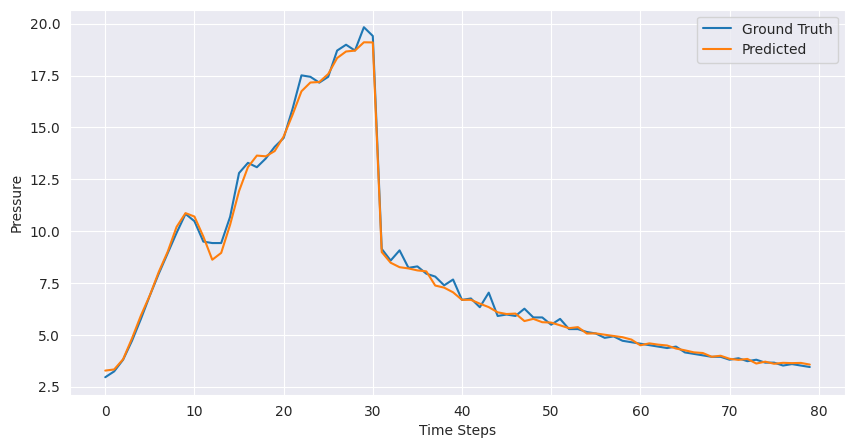

In [18]:
idx = 100616
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lm.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lm.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.2897921973227234


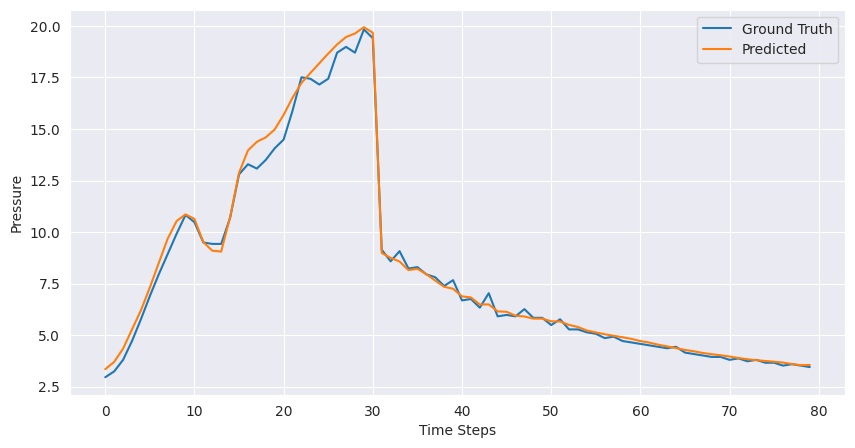

In [19]:
idx = 100616
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmrc.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmrc.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.17174334217205064


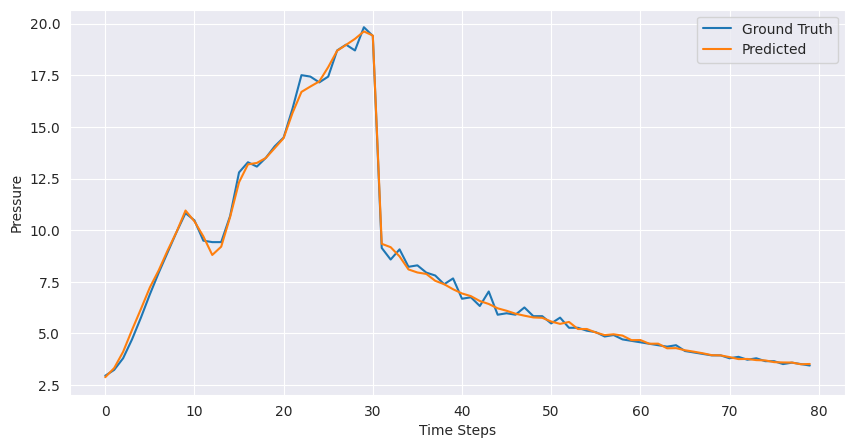

In [20]:
idx = 100616
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmt.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmt.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

## 122413 - LMRC Better

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.22062482418690266


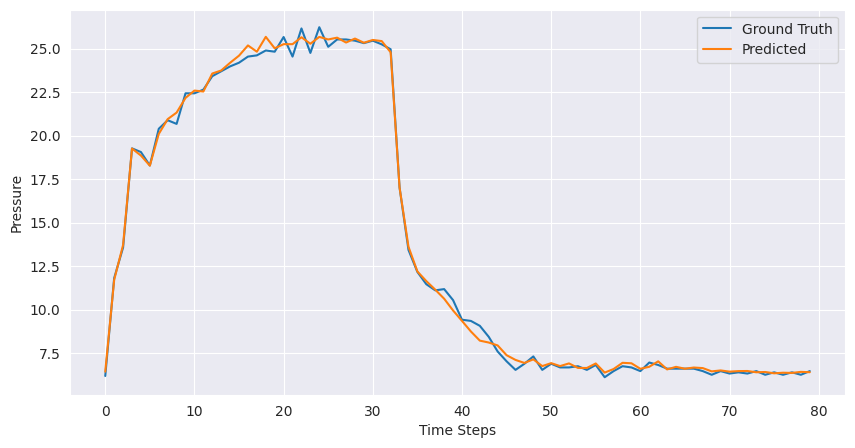

In [21]:
idx = 122413
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lm.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lm.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.16864462201488686


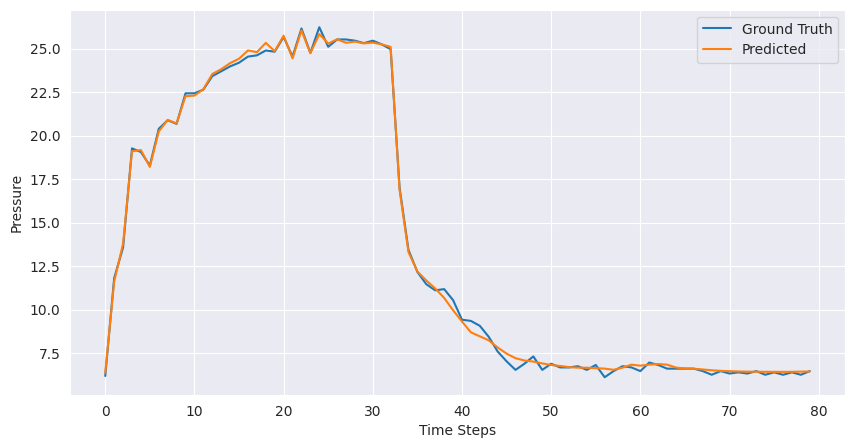

In [22]:
idx = 122413
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmrc.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmrc.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.20649784814370015


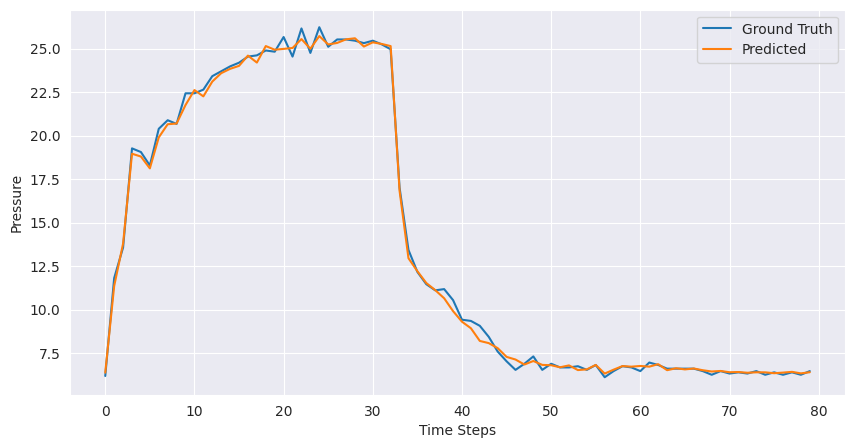

In [23]:
idx = 122413
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmt.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmt.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

## 125749 - LM Better

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.48377817099546744


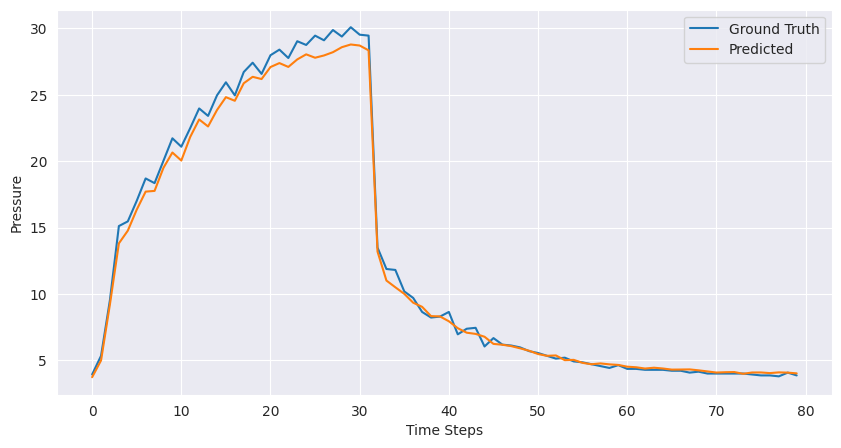

In [24]:
idx = 125749
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lm.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lm.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 1.3358933609504624


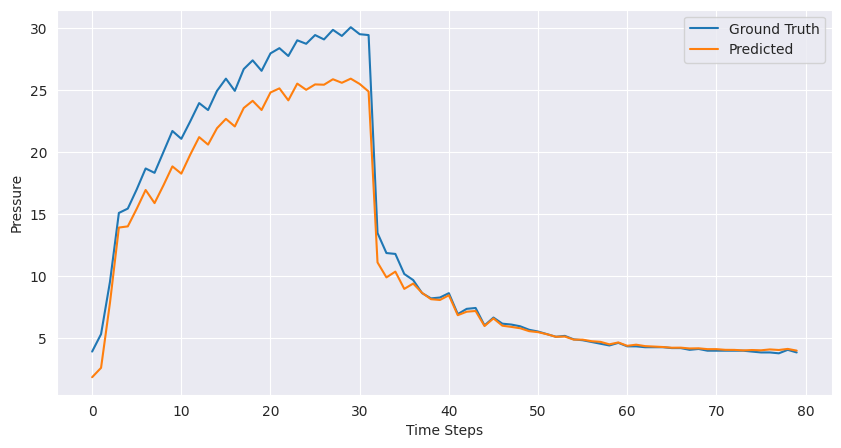

In [25]:
idx = 125749
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmrc.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmrc.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.7943930315136575


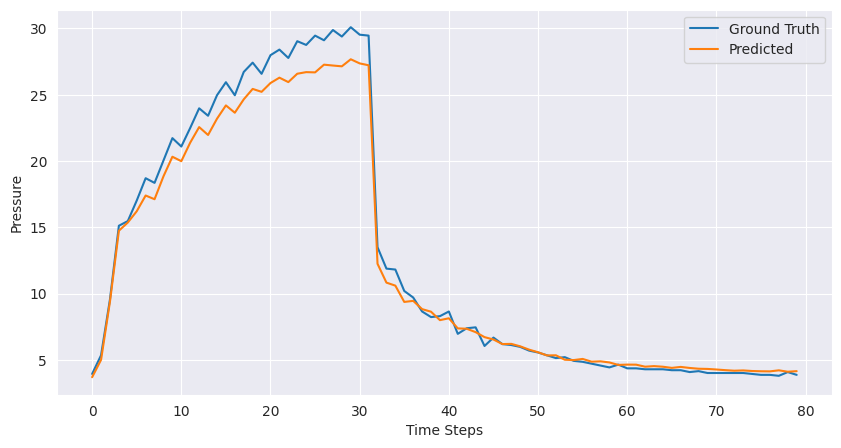

In [26]:
idx = 125749
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmt.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmt.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

## 125680 - LMRC Better

1/1 [==============================] - 5s 5s/step
Mean Absolute Error (MAE): 0.17760752381367167


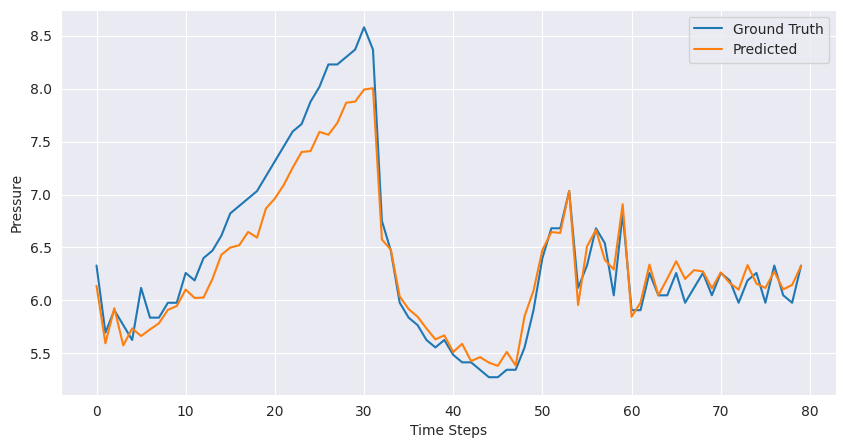

In [27]:
idx = 125680
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lm.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p =lm.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.1581807401546056


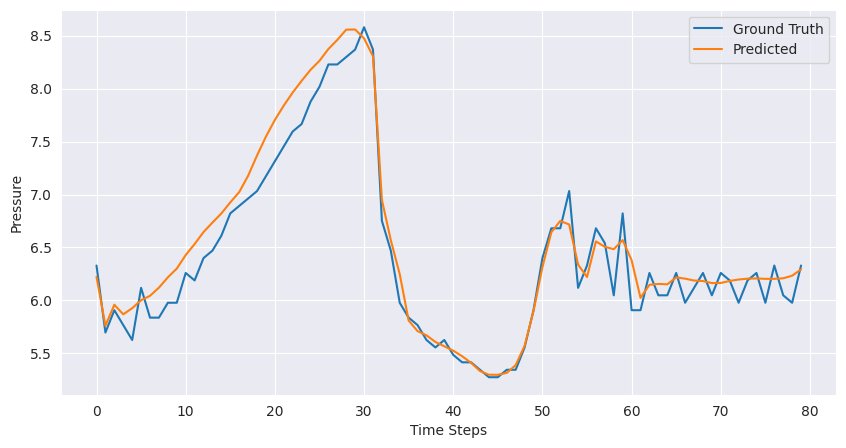

In [28]:
idx = 125680
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmrc.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p = lmrc.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")

1/1 [==============================] - 3s 3s/step
Mean Absolute Error (MAE): 0.27696521379286076


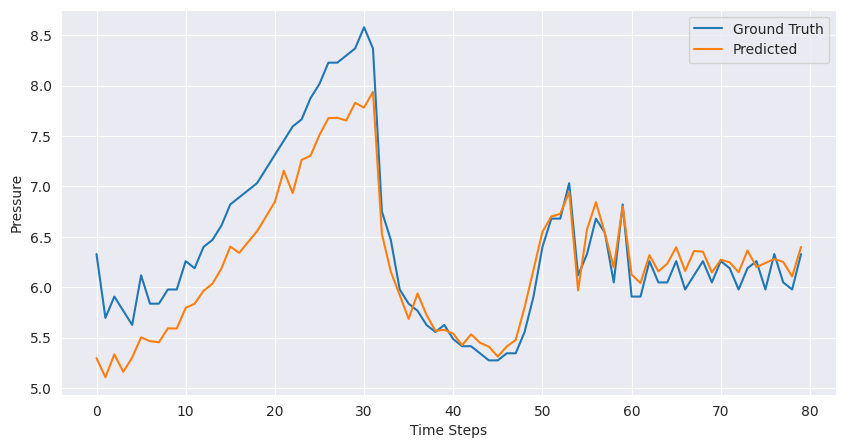

In [29]:
idx = 125680
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lmt.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p =lmt.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Reshape p to match the shape of y
        p = p.reshape(-1)  # Convert p to a 1D array

        # Calculate MAE
        mae = mean_absolute_error(y, p)

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p, label="Predicted")
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")